# Lead Scoring Case Study

## Libraries

In [1]:
# Basic libraries 
import pandas as pd
import numpy as np

# Data Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

## Reading and Understanding Data

In [2]:
#Reading the data 
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Shape
df.shape

(9240, 37)

In [4]:
# Statistics
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
# datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Multiple columns have null values.. 

## Data Cleaning & Handling Null values

In [6]:
# drop prospect ID
df.drop('Prospect ID', axis = 1, inplace = True)

In [7]:
# Replace "Select" category with null values
df = df.replace('Select', np.nan)

In [8]:
# Percentage of null values for each column
(df.isnull().sum() / df.shape[0]) * 100

Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

Dropping all those columns that have missing values > 35% as those columns are not important from business perspective.

In [9]:
# Drop columns that have null values > 35% 
df.drop(['How did you hear about X Education',  
         'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 
         'Asymmetrique Activity Score', 'Asymmetrique Profile Score',
         'Lead Quality', 'Lead Profile','City','Tags','Specialization'], 
        axis = 1, inplace = True)

df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,No,No,No,No,No,No,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,No,No,No,No,No,No,No,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,No,No,No,No,No,No,No,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,No,No,No,No,No,No,No,No,No,Modified


In [10]:
# Rechecking % null values
(df.isnull().sum() / df.shape[0]) * 100

Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

Five columns that still have high null values but less than 35%

In [11]:
# 'Country' Column
df.Country.value_counts(normalize = True, dropna = False) * 100

India                   70.259740
NaN                     26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Kuwait                   0.043290
South Africa             0.043290
Canada                   0.043290
Nigeria                  0.043290
Germany                  0.043290
Sweden                   0.032468
Philippines              0.021645
Uganda                   0.021645
Italy                    0.021645
Bangladesh               0.021645
Netherlands              0.021645
Asia/Pacific Region      0.021645
China                    0.021645
Belgium                  0.021645
Ghana                    0.021645
Kenya         

The column data is heavily skewed, we can drop this column.

In [12]:
df.drop('Country', axis = 1, inplace = True)

In [13]:
# 'What is your current occupation' column
df['What is your current occupation'].value_counts(normalize = True, dropna = False) * 100

Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

Here,we can see that around 60% of the users are unemployed , 30% are NAN and around 8% are working professionals so we can make 3 categories ( Unemployed,working professionals and others) and then distribute NAN values proportionally.

In [14]:
# making 'other' subhead 
df.loc[(df['What is your current occupation'] == 'Student') | (df['What is your current occupation'] == 'Other') | (df['What is your current occupation'] == 'Housewife') | 
       (df['What is your current occupation'] == 'Businessman') , 'What is your current occupation'] = 'Student and Others'

In [15]:
df['What is your current occupation'].value_counts(normalize = True) * 100

Unemployed              85.496183
Working Professional    10.778626
Student and Others       3.725191
Name: What is your current occupation, dtype: float64

In [16]:
# impute proportionately
df['What is your current occupation'] = df['What is your current occupation'].fillna(pd.Series(np.random.choice(['Unemployed', 'Working Professional', 
                                                                    'Student and Others'], 
                                                                   p = [0.8550, 0.1078, 0.0372], size = len(df))))

In [17]:
# 'What matters most to you in choosing a course' column
df['What matters most to you in choosing a course'].value_counts(normalize = True, dropna = False) * 100

Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

The column data is heavily skewed with only 2 values "Better Career Prospects" and null values consisting of 99.97% of the data which is very high and thus we can drop this column.

In [18]:
df.drop('What matters most to you in choosing a course', axis = 1, inplace = True)

In [19]:
# Rechecking % null values
(df.isnull().sum() / df.shape[0]) * 100

Lead Number                                 0.000000
Lead Origin                                 0.000000
Lead Source                                 0.389610
Do Not Email                                0.000000
Do Not Call                                 0.000000
Converted                                   0.000000
TotalVisits                                 1.482684
Total Time Spent on Website                 0.000000
Page Views Per Visit                        1.482684
Last Activity                               1.114719
What is your current occupation             0.000000
Search                                      0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
X Education Forums                          0.000000
Newspaper                                   0.000000
Digital Advertisement                       0.000000
Through Recommendations                     0.000000
Receive More Updates About Our Courses      0.

Still 4 columns have null value namely "Lead Source","TotalVisits","Page Views Per Visit" and 'Last Activity'.

In [20]:
# 'Lead Source' column
df['Lead Source'].value_counts(normalize = True, dropna = False) * 100

Google               31.038961
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
NaN                   0.389610
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0.010823
Name: Lead Source, dtype: float64

In [21]:
# Imputing with mode as it is categorical column
df['Lead Source'].fillna(df['Lead Source'].mode()[0], inplace=True)

In [22]:
# 'TotalVisits' column
df['TotalVisits'].value_counts(normalize = True, dropna = False) * 100

0.0      23.690476
2.0      18.181818
3.0      14.134199
4.0      12.121212
5.0       8.474026
6.0       5.043290
1.0       4.274892
7.0       3.344156
8.0       2.424242
9.0       1.774892
NaN       1.482684
10.0      1.233766
11.0      0.930736
13.0      0.519481
12.0      0.487013
14.0      0.389610
16.0      0.227273
15.0      0.194805
17.0      0.173160
18.0      0.162338
20.0      0.129870
19.0      0.097403
21.0      0.064935
23.0      0.064935
24.0      0.054113
25.0      0.054113
27.0      0.054113
22.0      0.032468
29.0      0.021645
28.0      0.021645
26.0      0.021645
141.0     0.010823
55.0      0.010823
30.0      0.010823
43.0      0.010823
74.0      0.010823
41.0      0.010823
54.0      0.010823
115.0     0.010823
251.0     0.010823
32.0      0.010823
42.0      0.010823
Name: TotalVisits, dtype: float64

In [23]:
# imputing with median as null values are very less in number and it is nummerical coulmn
df.TotalVisits.fillna(df.TotalVisits.median(), inplace=True)

In [24]:
# 'Page Views Per Visit' column
df['Page Views Per Visit'].value_counts(normalize = True, dropna = False) * 100

0.00    23.690476
2.00    19.426407
3.00    12.943723
4.00     9.696970
1.00     7.045455
          ...    
2.56     0.010823
6.33     0.010823
1.64     0.010823
8.21     0.010823
2.08     0.010823
Name: Page Views Per Visit, Length: 115, dtype: float64

In [25]:
# imputing with median as null values are very less in number and it is nummerical coulmn
df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].median(), inplace=True)

In [26]:
# 'Last Activity' column
df['Last Activity'].value_counts(normalize = True, dropna = False) * 100

Email Opened                    37.196970
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
NaN                              1.114719
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Received                   0.021645
Email Marked Spam                0.021645
Visited Booth in Tradeshow       0.010823
Resubscribed to emails           0.010823
Name: Last Activity, dtype: float64

In [27]:
# Imputing with mode as it is categorical column
df['Last Activity'].fillna(df['Last Activity'].mode()[0], inplace=True)

In [28]:
# Rechecking Percentage of null values for each column
(df.isnull().sum() / df.shape[0]) * 100

Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content           0.0
Get updates on DM Content               

No null values now.

### Handling unique values categorical column 

In [29]:
for a, b in df.select_dtypes(include='object').nunique().to_dict().items():
    print('{} = {}'.format(a,b))

Lead Origin = 5
Lead Source = 21
Do Not Email = 2
Do Not Call = 2
Last Activity = 17
What is your current occupation = 3
Search = 2
Magazine = 1
Newspaper Article = 2
X Education Forums = 2
Newspaper = 2
Digital Advertisement = 2
Through Recommendations = 2
Receive More Updates About Our Courses = 1
Update me on Supply Chain Content = 1
Get updates on DM Content = 1
I agree to pay the amount through cheque = 1
A free copy of Mastering The Interview = 2
Last Notable Activity = 16


In [30]:
# "Lead Origin" column
df["Lead Origin"].value_counts(normalize = True, dropna = False) * 100

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64

In [31]:
# Combining to reduce unique values as few of them are very small in proportion, 
df.loc[(df["Lead Origin"] == 'Lead Import') | (df["Lead Origin"] == 'Quick Add Form') | (df["Lead Origin"] == 'Lead Add Form')
       , "Lead Origin"] = 'Lead Add Form and Others'

In [32]:
#recheck
df["Lead Origin"].value_counts(normalize = True, dropna = False) * 100

Landing Page Submission     52.878788
API                         38.744589
Lead Add Form and Others     8.376623
Name: Lead Origin, dtype: float64

In [33]:
# "Lead Source" column
df["Lead Source"].value_counts(normalize = True, dropna = False) * 100

Google               31.428571
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0.010823
Name: Lead Source, dtype: float64

In [34]:
# Keeping top 5 and from 6th combining rest as from 6th percenatge is very very less.
df['Lead Source'] = df['Lead Source'].apply(lambda x: x if 
                                            ((x== 'Google') | (x=='Direct Traffic') | (x=='Olark Chat') | 
                                             (x=='Organic Search') | (x=='Reference')) 
                                            else 'Other Social Sites')

In [35]:
#recheck
df["Lead Source"].value_counts(normalize = True, dropna = False) * 100

Google                31.428571
Direct Traffic        27.521645
Olark Chat            18.993506
Organic Search        12.489177
Reference              5.779221
Other Social Sites     3.787879
Name: Lead Source, dtype: float64

In [36]:
# "Last Activity" column
df["Last Activity"].value_counts(normalize = True, dropna = False) * 100

Email Opened                    38.311688
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Received                   0.021645
Email Marked Spam                0.021645
Visited Booth in Tradeshow       0.010823
Resubscribed to emails           0.010823
Name: Last Activity, dtype: float64

In [37]:
# Keeping top 7 and from 8th combining rest as from 8th percenatge is very very less.
df['Last Activity'] = df['Last Activity'].apply(lambda x: x if 
                                            ((x== 'Email Opened') | (x=='SMS Sent') | (x=='Olark Chat Conversation') | 
                                             (x=='Page Visited on Website') | (x=='Email Bounced')| (x=='Email Link Clicked') | (x=='Converted to Lead')) 
                                            else 'Other activties')

In [38]:
#recheck
df["Last Activity"].value_counts(normalize = True, dropna = False) * 100

Email Opened               38.311688
SMS Sent                   29.707792
Olark Chat Conversation    10.530303
Page Visited on Website     6.926407
Converted to Lead           4.632035
Email Bounced               3.528139
Other activties             3.474026
Email Link Clicked          2.889610
Name: Last Activity, dtype: float64

In [39]:
# "Last Notable Activity" column
df["Last Notable Activity"].value_counts(normalize = True, dropna = False) * 100

Modified                        36.872294
Email Opened                    30.595238
SMS Sent                        23.506494
Page Visited on Website          3.441558
Olark Chat Conversation          1.980519
Email Link Clicked               1.872294
Email Bounced                    0.649351
Unsubscribed                     0.508658
Unreachable                      0.346320
Had a Phone Conversation         0.151515
Email Marked Spam                0.021645
Approached upfront               0.010823
Resubscribed to emails           0.010823
View in browser link Clicked     0.010823
Form Submitted on Website        0.010823
Email Received                   0.010823
Name: Last Notable Activity, dtype: float64

In [40]:
# Keeping top 6 and from 7th combining rest as from 7th percenatge is very very less.
df['Last Notable Activity'] = df['Last Notable Activity'].apply(lambda x: x if 
                                            ((x== 'Modified') | (x=='Email Opened') | (x=='SMS Sent') | 
                                             (x=='Page Visited on Website') | (x=='Olark Chat Conversation')| (x=='Email Link Clicked')) 
                                            else 'Other notable activties')

In [41]:
#recheck
df["Last Notable Activity"].value_counts(normalize = True, dropna = False) * 100

Modified                   36.872294
Email Opened               30.595238
SMS Sent                   23.506494
Page Visited on Website     3.441558
Olark Chat Conversation     1.980519
Email Link Clicked          1.872294
Other notable activties     1.731602
Name: Last Notable Activity, dtype: float64

### Handling Binary columns and data imbalance

Dropping all those columns that have only 1 unique entry

In [42]:
#recheck unique values
for a, b in df.select_dtypes(include='object').nunique().to_dict().items():
    print('{} = {}'.format(a,b))

Lead Origin = 3
Lead Source = 6
Do Not Email = 2
Do Not Call = 2
Last Activity = 8
What is your current occupation = 3
Search = 2
Magazine = 1
Newspaper Article = 2
X Education Forums = 2
Newspaper = 2
Digital Advertisement = 2
Through Recommendations = 2
Receive More Updates About Our Courses = 1
Update me on Supply Chain Content = 1
Get updates on DM Content = 1
I agree to pay the amount through cheque = 1
A free copy of Mastering The Interview = 2
Last Notable Activity = 7


In [43]:
binary_drop = ['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 
           'I agree to pay the amount through cheque']

df.drop(binary_drop, axis = 1, inplace = True)

Now we will check for Data Imbalance

In [44]:
# selecting rest of the binary columns in a new dataframe
df_data = df[['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 
           'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview']]

# see value counts for each of the columns
for i in df_data.columns:
    x = (df_data[i].value_counts(normalize = True)) * 100
    print(x)
    print()

No     92.056277
Yes     7.943723
Name: Do Not Email, dtype: float64

No     99.978355
Yes     0.021645
Name: Do Not Call, dtype: float64

No     99.848485
Yes     0.151515
Name: Search, dtype: float64

No     99.978355
Yes     0.021645
Name: Newspaper Article, dtype: float64

No     99.989177
Yes     0.010823
Name: X Education Forums, dtype: float64

No     99.989177
Yes     0.010823
Name: Newspaper, dtype: float64

No     99.95671
Yes     0.04329
Name: Digital Advertisement, dtype: float64

No     99.924242
Yes     0.075758
Name: Through Recommendations, dtype: float64

No     68.744589
Yes    31.255411
Name: A free copy of Mastering The Interview, dtype: float64



Dropping those columns that have significant data imbalance

In [45]:
imbalance_drop = ['Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 
           'Newspaper','Digital Advertisement','Through Recommendations']

df.drop(imbalance_drop, axis = 1, inplace = True)

In [46]:
df.shape

(9240, 12)

## Exploratory Data Analysis

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9240 non-null   int64  
 1   Lead Origin                             9240 non-null   object 
 2   Lead Source                             9240 non-null   object 
 3   Do Not Email                            9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9240 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9240 non-null   float64
 8   Last Activity                           9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  A free copy of Mastering The Interview  9240 non-null   obje

### Numericals columns 

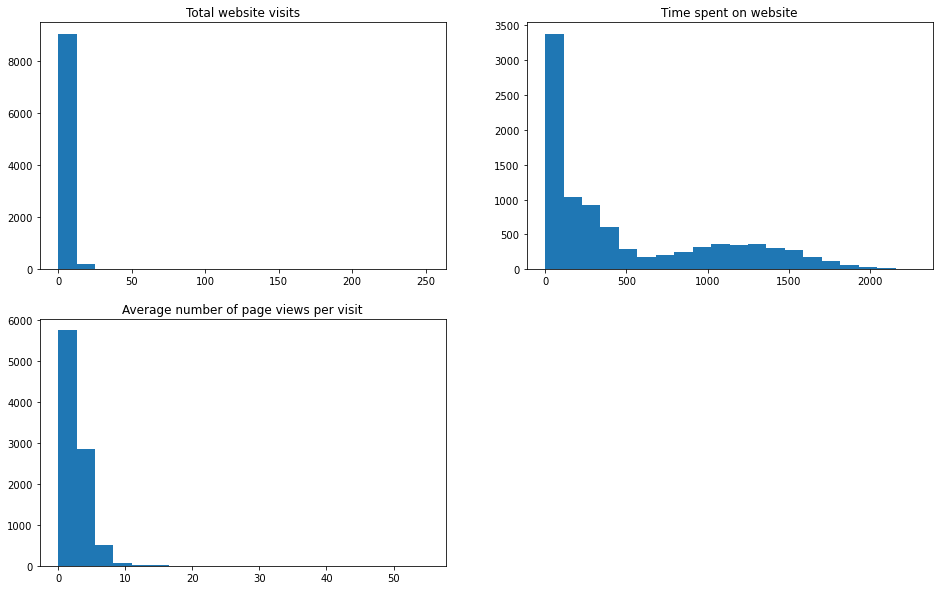

In [48]:
# 'Lead number' is identifier column and 'converted' is target column so first checking with rest of 3 numerical columns.

fig = plt.figure(figsize = (16, 10))

plt.subplot(2, 2, 1)
plt.hist(df.TotalVisits,bins = 20)
plt.title('Total website visits')

plt.subplot(2, 2, 2)
plt.hist(df["Total Time Spent on Website"],bins = 20)
plt.title('Time spent on website')

plt.subplot(2, 2, 3)
plt.hist(df["Page Views Per Visit"],bins = 20)
plt.title('Average number of page views per visit')

plt.show()

High peaks which is an indication of outliers so we will check for that.

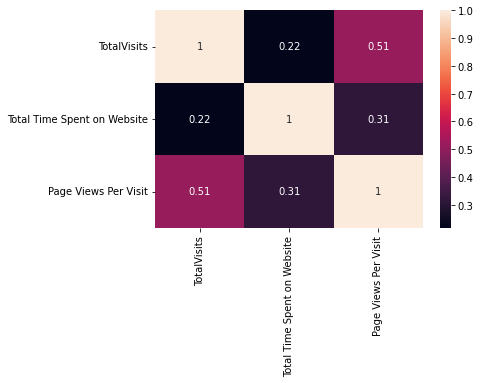

In [49]:
# Heatmap for correlation
sns.heatmap(df[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']].corr(), annot = True)
plt.show()

Nothing as such from correlation so moving with boxplot.

### Outlier and its treatment

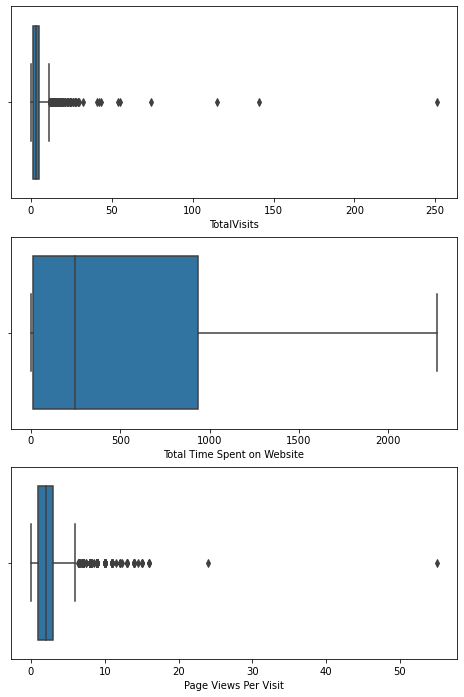

In [50]:
plt.figure(figsize = (8, 12))

plt.subplot(3,1,1)
sns.boxplot(df.TotalVisits)

plt.subplot(3,1,2)
sns.boxplot(df['Total Time Spent on Website'])

plt.subplot(3,1,3)
sns.boxplot(df['Page Views Per Visit'])
plt.show()

In [51]:
outlier_check = df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
outlier_check.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.438636,487.698268,2.357440
std,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
99%,17.000000,1840.610000,9.000000
max,251.000000,2272.000000,55.000000


Looking at both the box plots and the statistics, the data can be capped at 99 percentile.

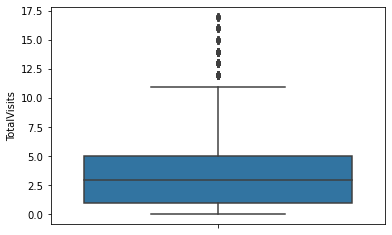

In [52]:
#Outlier Treatment: capping at 99% percentile for "TotalVisits"

Q3 = df.TotalVisits.quantile(0.99)
df = df[(df.TotalVisits <= Q3)]
sns.boxplot(y=df['TotalVisits'])
plt.show()

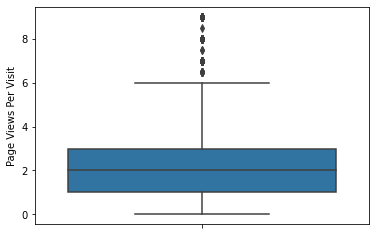

In [53]:
#Outlier Treatment: capping at 99% percentile for "Page Views Per Visit"

Q3 = df['Page Views Per Visit'].quantile(0.99)
df = df[(df['Page Views Per Visit']<= Q3)]
sns.boxplot(y=df['Page Views Per Visit'])
plt.show()

### Categorical columns

In [54]:
df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,Modified
1,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Unemployed,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Student and Others,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Other activties,Unemployed,No,Modified
4,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,Modified


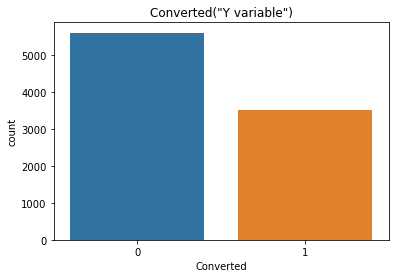

In [55]:
sns.countplot(df['Converted'])
plt.title('Converted("Y variable")')
plt.show()

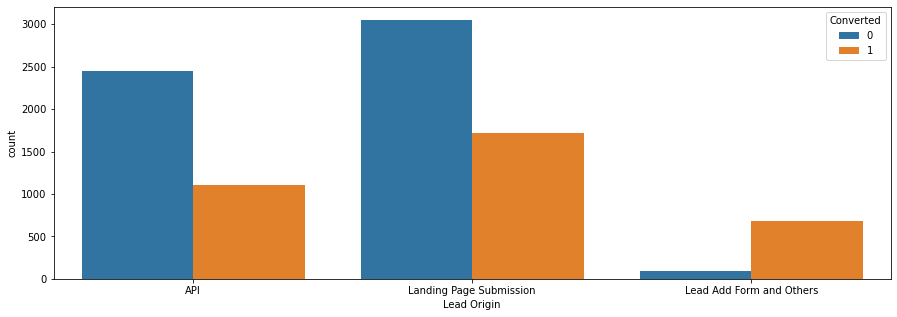

In [56]:
# 'Lead Origin' Column
plt.figure(figsize=(15,5))
a1=sns.countplot(df['Lead Origin'], hue=df.Converted)
a1.set_xticklabels(a1.get_xticklabels())
plt.show()

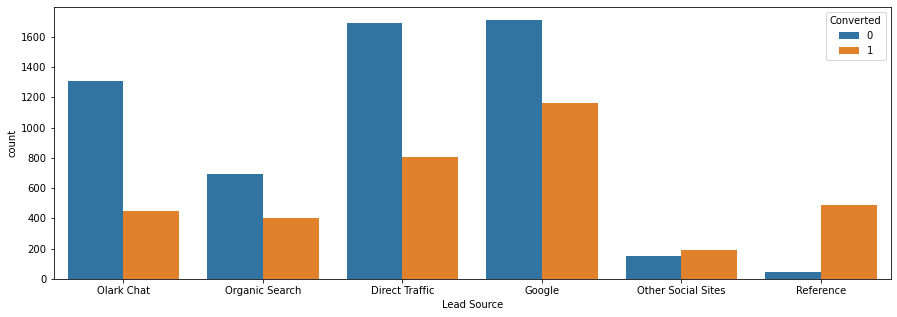

In [57]:
# 'Lead Source' Column
plt.figure(figsize=(15,5))
a1=sns.countplot(df['Lead Source'], hue=df.Converted)
a1.set_xticklabels(a1.get_xticklabels())
plt.show()

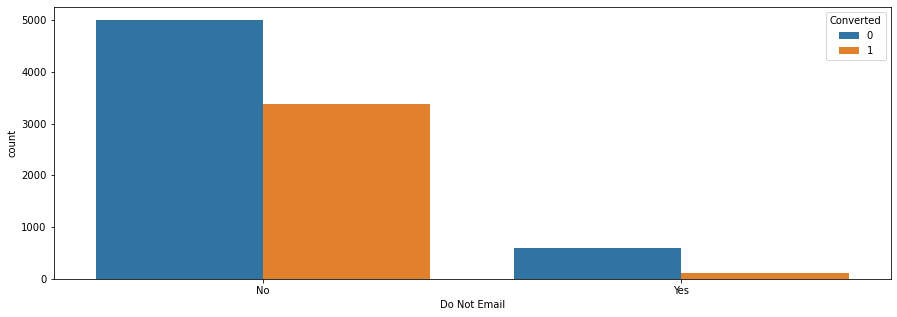

In [58]:
# 'Do Not Email' Column
plt.figure(figsize=(15,5))
a1=sns.countplot(df['Do Not Email'], hue=df.Converted)
a1.set_xticklabels(a1.get_xticklabels())
plt.show()

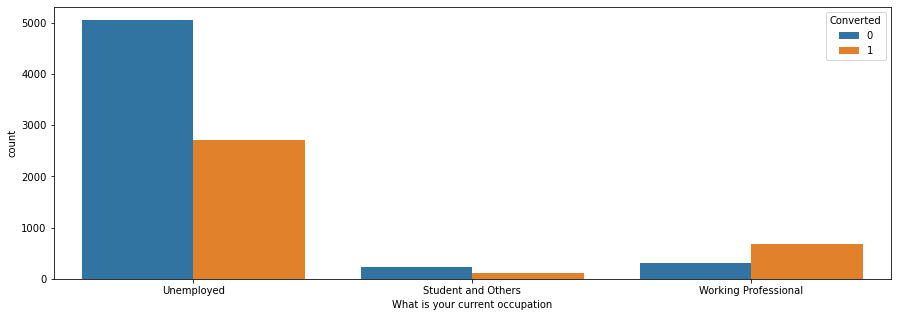

In [59]:
# 'What is your current occupation' Column
plt.figure(figsize=(15,5))
a1=sns.countplot(df['What is your current occupation'], hue=df.Converted)
a1.set_xticklabels(a1.get_xticklabels())
plt.show()

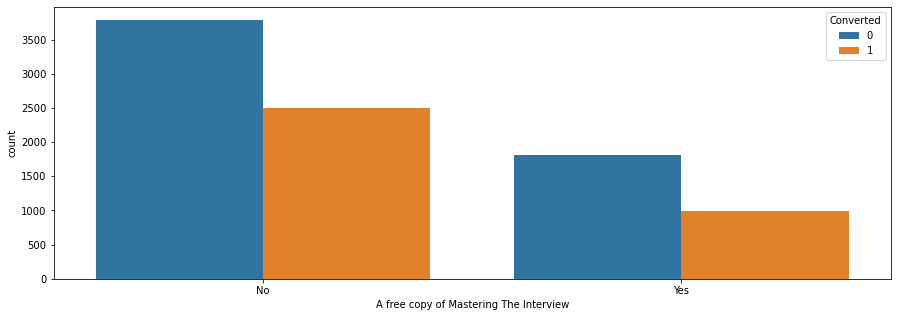

In [60]:
# 'A free copy of Mastering The Interview' Column
plt.figure(figsize=(15,5))
a1=sns.countplot(df['A free copy of Mastering The Interview'], hue=df.Converted)
a1.set_xticklabels(a1.get_xticklabels())
plt.show()

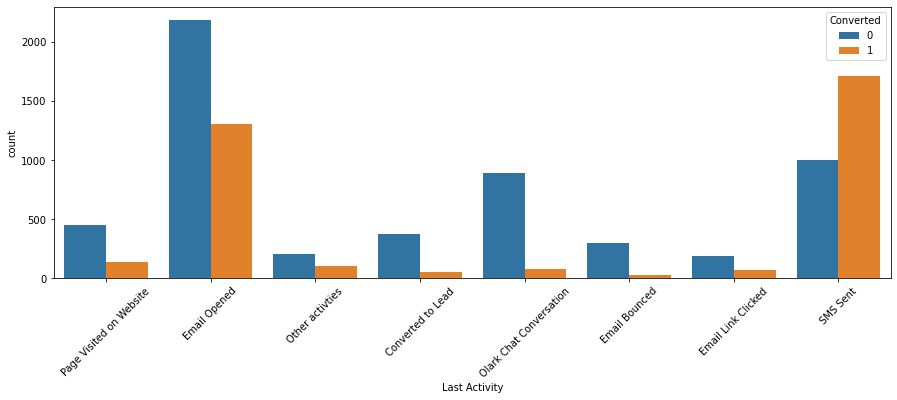

In [61]:
# 'Last Activity' Column
plt.figure(figsize=(15,5))
a1=sns.countplot(df['Last Activity'], hue=df.Converted)
a1.set_xticklabels(a1.get_xticklabels(),rotation=45)
plt.show()

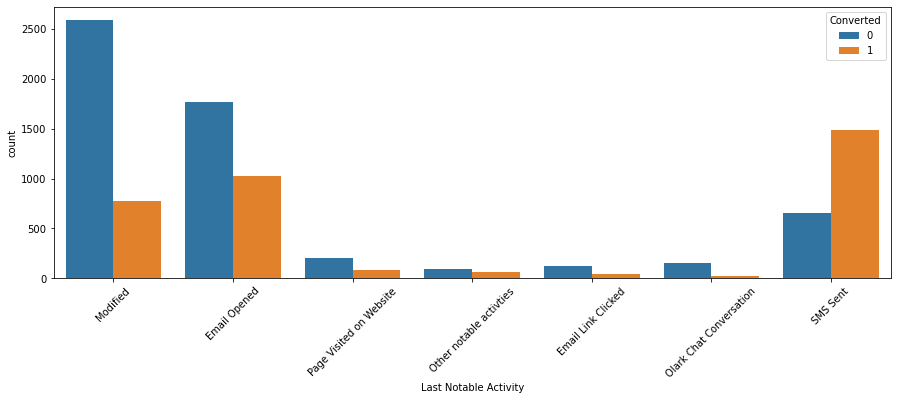

In [62]:
# 'Last Notable Activity' Column
plt.figure(figsize=(15,5))
a1=sns.countplot(df['Last Notable Activity'], hue=df.Converted)
a1.set_xticklabels(a1.get_xticklabels(),rotation=45)
plt.show()

## Data Preparation

### Converting Binary (Yes/No) to 0/1

In [63]:
# determine unique values
for a, b in df.select_dtypes(include='object').nunique().to_dict().items():
    print('{} = {}'.format(a,b))

Lead Origin = 3
Lead Source = 6
Do Not Email = 2
Last Activity = 8
What is your current occupation = 3
A free copy of Mastering The Interview = 2
Last Notable Activity = 7


In [64]:
binlist = ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the  list
df[binlist] = df[binlist].apply(binary_map)

# check the operation was success
df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,Modified
1,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Unemployed,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Student and Others,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Other activties,Unemployed,0,Modified
4,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,Modified


### Creating dummy variable for categorical columns

In [65]:
# Creating a dummy variable for rest of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity', 'What is your current occupation', 'Last Notable Activity']], drop_first = True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy1], axis=1)

In [66]:
# Dropping the columns for which dummies have been created
df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'What is your current occupation', 'Last Notable Activity'], axis = 1, inplace = True)

df.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form and Others,Lead Source_Google,...,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other notable activties,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,660737,0,0,0.0,0,0.0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
1,660728,0,0,5.0,674,2.5,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,660727,0,1,2.0,1532,2.0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,660719,0,0,1.0,305,1.0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
4,660681,0,1,2.0,1428,1.0,0,1,0,1,...,0,0,1,0,0,1,0,0,0,0


In [67]:
df.shape

(9090, 29)

## Test-Train Split

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
# Putting feature variable to X
X = df.drop(['Lead Number', 'Converted'], axis=1)

X.head(2)

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form and Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other notable activties,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,1,0,...,1,0,1,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0


In [70]:
# Putting response variable to y
y = df['Converted']

y.head(2)

0    0
1    0
Name: Converted, dtype: int64

In [71]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [72]:
from sklearn.preprocessing import MinMaxScaler
# Scaling the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head(3)

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form and Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other notable activties,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
302,0,0.411765,0.110035,0.258889,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
6087,1,0.000000,0.000000,0.000000,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
1033,0,0.294118,0.206866,0.555556,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [73]:
# checking the conversion rate
conversion = (sum(df['Converted'])/len(df['Converted'].index))*100
conversion

38.448844884488445

### Looking at correlations

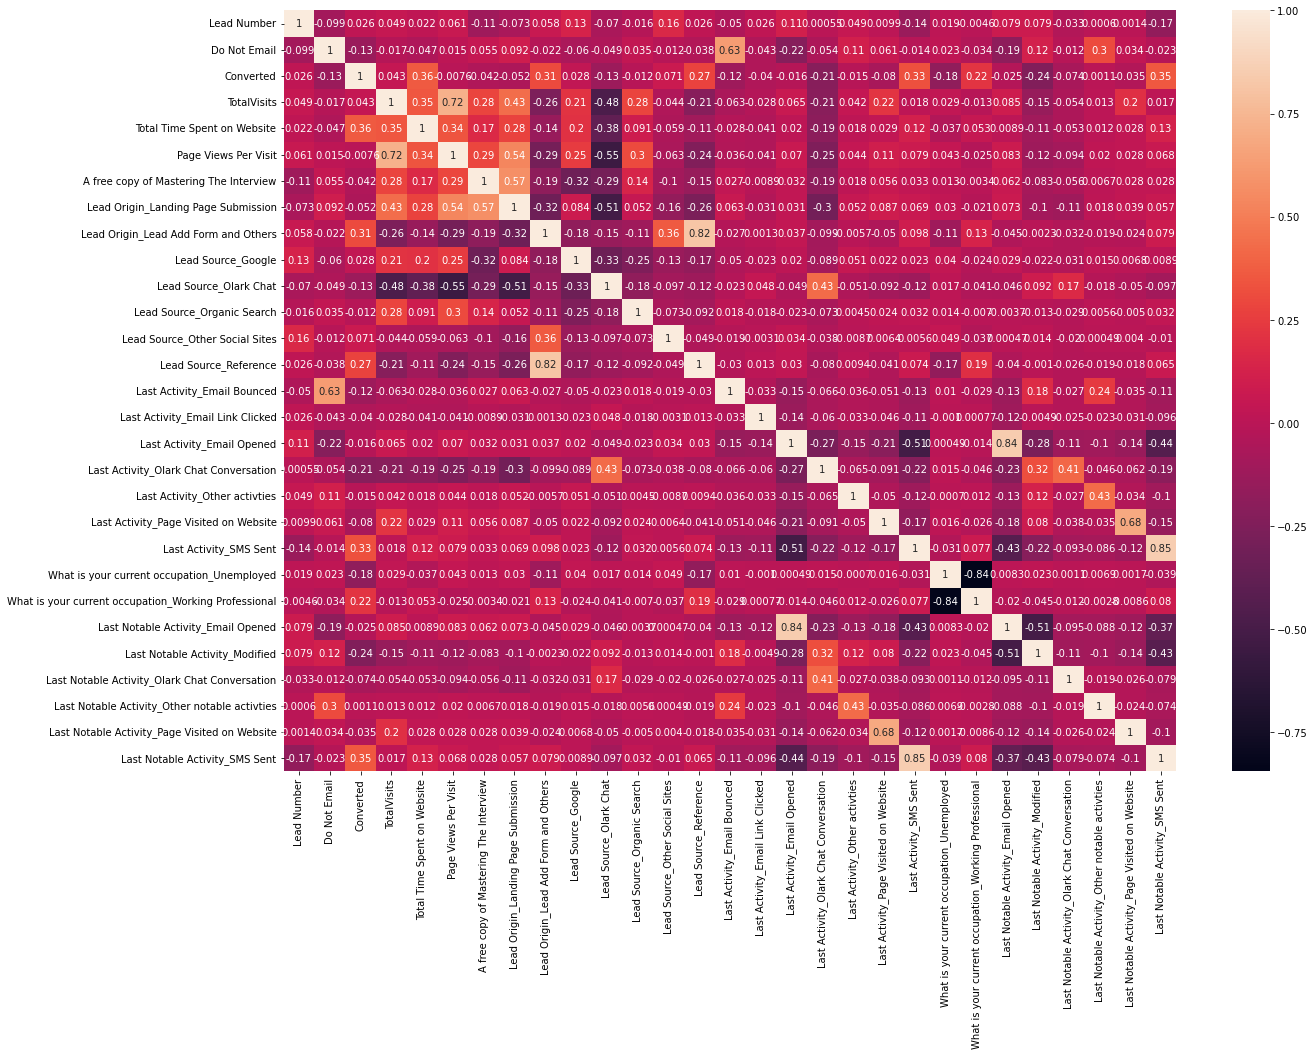

In [74]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,14))       
sns.heatmap(df.corr(),annot = True)
plt.show()

Dropping highly correlated dummy variable

In [75]:
X_test.drop(['Lead Origin_Lead Add Form and Others', 'Last Notable Activity_SMS Sent', 
                     'What is your current occupation_Working Professional'], axis = 1, inplace = True)

X_train.drop(['Lead Origin_Lead Add Form and Others', 'Last Notable Activity_SMS Sent', 
                     'What is your current occupation_Working Professional'], axis = 1, inplace = True)

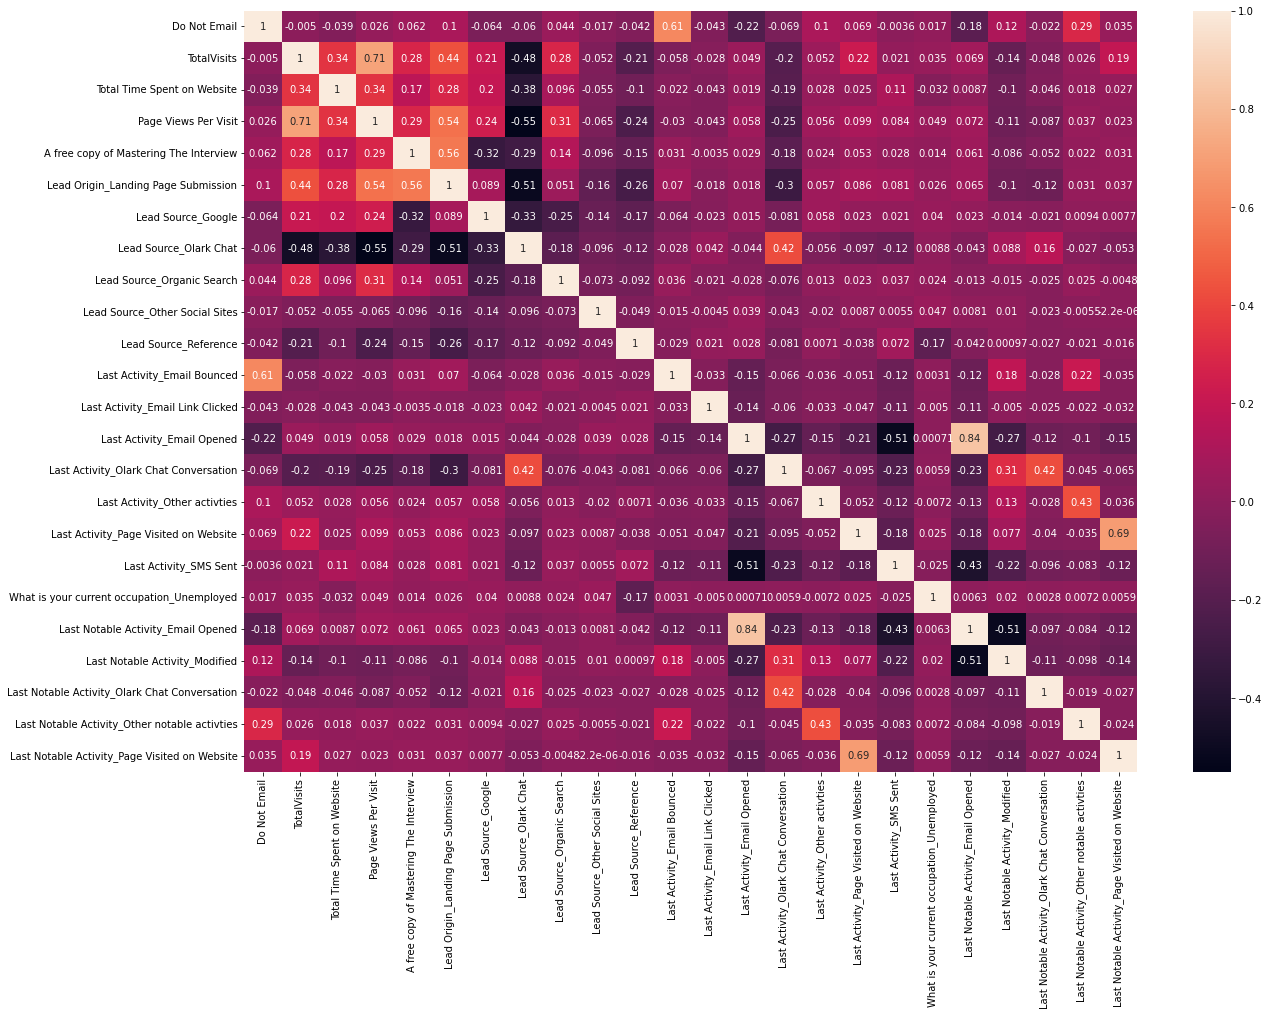

In [76]:
## lets check the correlation matrix again
plt.figure(figsize = (20,14))       
sns.heatmap(X_train.corr(),annot = True)
plt.show()

## Model Building

In [77]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [78]:
# Import RFE
from sklearn.feature_selection import RFE

In [79]:
# Running RFE with 15 variables as output
rfe = RFE(lr,n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [80]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 10),
 ('Lead Origin_Landing Page Submission', False, 8),
 ('Lead Source_Google', False, 6),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 9),
 ('Lead Source_Other Social Sites', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Last Activity_Email Bounced', False, 3),
 ('Last Activity_Email Link Clicked', False, 5),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Olark Chat Conversation', False, 2),
 ('Last Activity_Other activties', True, 1),
 ('Last Activity_Page Visited on Website', False, 7),
 ('Last Activity_SMS Sent', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('Last Notable Activity_Email Opened', True, 1),
 ('Last Notable Activity_Modified', True, 1),
 ('Last Notable Activity_Olark Chat Conversation', True, 1),
 ('Last Notable Ac

In [81]:
# assign columns
col = X_train.columns[rfe.support_]

In [82]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [83]:
# Importing statsmodels
import statsmodels.api as sm

In [84]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

#### Model 1

In [85]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6347
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2834.8
Date:                Mon, 27 Mar 2023   Deviance:                       5669.6
Time:                        17:02:20   Pearson chi2:                 6.53e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3551
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.2420      0.162     -7.674      0.000      -1.559      -0.925
Do Not Email                                     -1.3087      0.171     -7.638      0.000      -1.644      -0.973
TotalVisits                                       1.1270      0.276      4.083      0.000       0.586       1.668
Total Time Spent on Website                       4.3954      0.162     27.120      0.000       4.078       4.713
Page Views Per Visit                             -1.3979      0.253     -5.535      0.000      -1.893      -0.903
Lead Source_Olark Chat                            0.7466      0.118      6.314      0.000       0.515       0.978
Lead Source_Other Social Sites                    1.7937      0.161     11.109      0.000       1.477       2.110
Lead Source_Reference                             3.5300      0.210     16.810      0.000       3.118       3.942
Last Activity_Email Opened                        1.1946      0.148      8.089      0.000       0.905       1.484
Last Activity_Other activties                     1.0748      0.216      4.965      0.000       0.651       1.499
Last Activity_SMS Sent                            1.8143      0.114     15.937      0.000       1.591       2.037
What is your current occupation_Unemployed       -1.0074      0.094    -10.664      0.000      -1.193      -0.822
Last Notable Activity_Email Opened               -0.8994      0.168     -5.357      0.000      -1.228      -0.570
Last Notable Activity_Modified                   -1.1847      0.109    -10.887      0.000      -1.398      -0.971
Last Notable Activity_Olark Chat Conversation    -1.3138      0.319     -4.116      0.000      -1.939      -0.688
Last Notable Activity_Other notable activties     0.7593      0.329      2.306      0.021       0.114       1.405
=================================================================================================================
"""

In [86]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Last Notable Activity_Email Opened,7.21
7,Last Activity_Email Opened,6.92
3,Page Views Per Visit,5.99
10,What is your current occupation_Unemployed,5.22
1,TotalVisits,4.61
12,Last Notable Activity_Modified,2.87
9,Last Activity_SMS Sent,2.40
2,Total Time Spent on Website,2.15
4,Lead Source_Olark Chat,1.86
14,Last Notable Activity_Other notable activties,1.47


All features has pvalue below 0.05 and few features has higher VIF(>5) so first dropping a feature having higher VIF

In [87]:
# drop "Last Notable Activity_Email Opened"
X_train.drop(['Last Notable Activity_Email Opened'], axis = 1, inplace = True)

#### Model 2

In [88]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6348
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2848.9
Date:                Mon, 27 Mar 2023   Deviance:                       5697.8
Time:                        17:02:20   Pearson chi2:                 6.51e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3522
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.5152      0.154     -9.821      0.000      -1.818      -1.213
Do Not Email                                     -1.3265      0.171     -7.760      0.000      -1.662      -0.991
TotalVisits                                       1.2099      0.275      4.394      0.000       0.670       1.750
Total Time Spent on Website                       4.4115      0.162     27.280      0.000       4.095       4.728
Page Views Per Visit                             -1.4159      0.252     -5.619      0.000      -1.910      -0.922
Lead Source_Olark Chat                            0.7662      0.118      6.494      0.000       0.535       0.997
Lead Source_Other Social Sites                    1.8248      0.161     11.327      0.000       1.509       2.141
Lead Source_Reference                             3.6138      0.210     17.216      0.000       3.202       4.025
Last Activity_Email Opened                        0.6350      0.107      5.938      0.000       0.425       0.845
Last Activity_Other activties                     0.9735      0.215      4.529      0.000       0.552       1.395
Last Activity_SMS Sent                            1.9867      0.110     18.131      0.000       1.772       2.201
What is your current occupation_Unemployed       -1.0038      0.094    -10.657      0.000      -1.188      -0.819
Last Notable Activity_Modified                   -0.8245      0.085     -9.684      0.000      -0.991      -0.658
Last Notable Activity_Olark Chat Conversation    -1.0716      0.317     -3.383      0.001      -1.692      -0.451
Last Notable Activity_Other notable activties     1.0947      0.323      3.393      0.001       0.462       1.727
=================================================================================================================
"""

In [89]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,5.92
10,What is your current occupation_Unemployed,4.90
1,TotalVisits,4.61
7,Last Activity_Email Opened,2.68
9,Last Activity_SMS Sent,2.31
2,Total Time Spent on Website,2.15
11,Last Notable Activity_Modified,1.99
4,Lead Source_Olark Chat,1.82
13,Last Notable Activity_Other notable activties,1.43
8,Last Activity_Other activties,1.37


All features has pvalue below 0.05 and one feature have VIF above 5 so dropping it.

In [90]:
# drop "Last Notable Activity_Page Visited on Website"
X_train.drop(['Page Views Per Visit'], axis = 1, inplace = True)

#### Model 3

In [91]:
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6349
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2865.0
Date:                Mon, 27 Mar 2023   Deviance:                       5730.1
Time:                        17:02:20   Pearson chi2:                 6.51e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3489
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.7061      0.151    -11.334      0.000      -2.001      -1.411
Do Not Email                                     -1.3319      0.171     -7.806      0.000      -1.666      -0.998
TotalVisits                                       0.3881      0.234      1.661      0.097      -0.070       0.846
Total Time Spent on Website                       4.3893      0.161     27.213      0.000       4.073       4.705
Lead Source_Olark Chat                            1.0158      0.110      9.228      0.000       0.800       1.232
Lead Source_Other Social Sites                    1.9708      0.159     12.417      0.000       1.660       2.282
Lead Source_Reference                             3.8536      0.206     18.690      0.000       3.449       4.258
Last Activity_Email Opened                        0.5659      0.106      5.341      0.000       0.358       0.774
Last Activity_Other activties                     0.9243      0.215      4.301      0.000       0.503       1.345
Last Activity_SMS Sent                            1.8933      0.108     17.578      0.000       1.682       2.104
What is your current occupation_Unemployed       -1.0045      0.094    -10.677      0.000      -1.189      -0.820
Last Notable Activity_Modified                   -0.8466      0.085     -9.968      0.000      -1.013      -0.680
Last Notable Activity_Olark Chat Conversation    -1.0855      0.316     -3.436      0.001      -1.705      -0.466
Last Notable Activity_Other notable activties     1.0372      0.324      3.206      0.001       0.403       1.671
=================================================================================================================
"""

In [92]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,4.78
1,TotalVisits,2.80
6,Last Activity_Email Opened,2.49
2,Total Time Spent on Website,2.14
8,Last Activity_SMS Sent,2.13
10,Last Notable Activity_Modified,1.92
3,Lead Source_Olark Chat,1.65
12,Last Notable Activity_Other notable activties,1.43
7,Last Activity_Other activties,1.36
0,Do Not Email,1.24


Again, all features have VIF under 5 and only one feature has high pvalue so dropping it.

In [93]:
# drop "Page Views Per Visit"
X_train.drop(['TotalVisits'], axis = 1, inplace = True)

#### Model 4

In [94]:
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6350
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2866.4
Date:                Mon, 27 Mar 2023   Deviance:                       5732.8
Time:                        17:02:20   Pearson chi2:                 6.51e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3486
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.6058      0.138    -11.676      0.000      -1.875      -1.336
Do Not Email                                     -1.3436      0.171     -7.875      0.000      -1.678      -1.009
Total Time Spent on Website                       4.4167      0.161     27.517      0.000       4.102       4.731
Lead Source_Olark Chat                            0.9337      0.098      9.544      0.000       0.742       1.125
Lead Source_Other Social Sites                    1.9288      0.157     12.322      0.000       1.622       2.236
Lead Source_Reference                             3.7763      0.201     18.823      0.000       3.383       4.169
Last Activity_Email Opened                        0.5559      0.106      5.254      0.000       0.349       0.763
Last Activity_Other activties                     0.9304      0.215      4.337      0.000       0.510       1.351
Last Activity_SMS Sent                            1.8805      0.107     17.505      0.000       1.670       2.091
What is your current occupation_Unemployed       -1.0019      0.094    -10.662      0.000      -1.186      -0.818
Last Notable Activity_Modified                   -0.8605      0.085    -10.171      0.000      -1.026      -0.695
Last Notable Activity_Olark Chat Conversation    -1.0828      0.315     -3.435      0.001      -1.701      -0.465
Last Notable Activity_Other notable activties     1.0289      0.323      3.183      0.001       0.395       1.662
=================================================================================================================
"""

In [95]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif

,Features,VIF
0,Do Not Email,1.24
1,Total Time Spent on Website,1.99
2,Lead Source_Olark Chat,1.45
3,Lead Source_Other Social Sites,1.07
4,Lead Source_Reference,1.13
5,Last Activity_Email Opened,2.34
6,Last Activity_Other activties,1.36
7,Last Activity_SMS Sent,2.06
8,What is your current occupation_Unemployed,4.32
9,Last Notable Activity_Modified,1.90


Now, all features have VIF below 5 and all features has  pvalue below 0.05.

## Making  Prediction

In [96]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

302     0.589762
6087    0.020272
1033    0.242652
7656    0.199965
3241    0.762110
5738    0.271743
7366    0.177622
3680    0.039023
4170    0.746258
43      0.165164
dtype: float64

In [97]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.58976249, 0.02027158, 0.24265183, 0.19996461, 0.76211041,
       0.27174301, 0.17762187, 0.03902302, 0.74625756, 0.16516423])

In [98]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Probability':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Probability
0,0,0.589762
1,0,0.020272
2,0,0.242652
3,0,0.199965
4,1,0.762110


In [99]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Probability,Predicted
0,0,0.589762,1
1,0,0.020272,0
2,0,0.242652,0
3,0,0.199965,0
4,1,0.762110,1


# Model Evaluation

In [100]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [101]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3438,  497],
       [ 803, 1625]], dtype=int64)

In [102]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7956938550997957

Accuracy is around 80% which is very good.

In [103]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [104]:
# sensitivity
TP/(TP+FN)

0.6692751235584844

In [105]:
# Specificity
TN/(TN+FP)

0.873697585768742

## Optimise Cut off (ROC Curve)

In [106]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [107]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Probability, drop_intermediate = False )

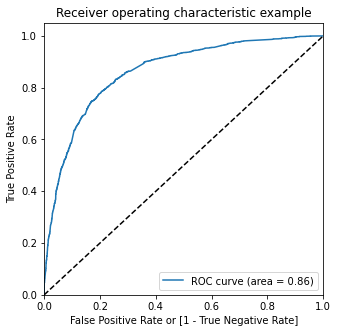

In [108]:
# ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Probability)

The area under ROC curve is 0.86 which is a very good value.

In [109]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.589762,1,1,1,1,1,1,1,0,0,0,0
1,0,0.020272,0,1,0,0,0,0,0,0,0,0,0
2,0,0.242652,0,1,1,1,0,0,0,0,0,0,0
3,0,0.199965,0,1,1,0,0,0,0,0,0,0,0
4,1,0.762110,1,1,1,1,1,1,1,1,1,0,0


In [110]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])

# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
cutoff_df

,probability,accuracy,sensitivity,specificity
0.0,0.0,0.381581,1.000000,0.000000
0.1,0.1,0.573472,0.972405,0.327319
0.2,0.2,0.711928,0.913509,0.587548
0.3,0.3,0.772592,0.838138,0.732147
0.4,0.4,0.793651,0.764415,0.811690
0.5,0.5,0.795694,0.669275,0.873698
0.6,0.6,0.776363,0.546129,0.918424
0.7,0.7,0.760647,0.463756,0.943837
0.8,0.8,0.723558,0.329077,0.966963
0.9,0.9,0.676253,0.170099,0.988564


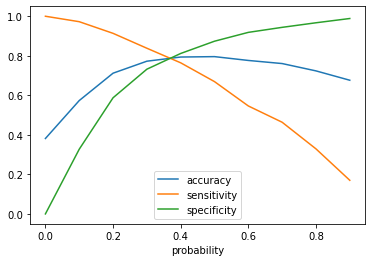

In [111]:
# Plot
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

From the graph it is visible that the optimal cut off is at 0.38.

In [112]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Probability.map( lambda x: 1 if x > 0.38 else 0)
y_train_pred_final.head()

,Converted,Conversion_Probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.589762,1,1,1,1,1,1,1,0,0,0,0,1
1,0,0.020272,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.242652,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.199965,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0.762110,1,1,1,1,1,1,1,1,1,0,0,1


In [113]:
# Now let us calculate the lead score

y_train_pred_final['lead_score'] = y_train_pred_final.Conversion_Probability.map(lambda x: round(x*100))
y_train_pred_final.head(20)

,Converted,Conversion_Probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
0,0,0.589762,1,1,1,1,1,1,1,0,0,0,0,1,59
1,0,0.020272,0,1,0,0,0,0,0,0,0,0,0,0,2
2,0,0.242652,0,1,1,1,0,0,0,0,0,0,0,0,24
3,0,0.199965,0,1,1,0,0,0,0,0,0,0,0,0,20
4,1,0.762110,1,1,1,1,1,1,1,1,1,0,0,1,76
5,0,0.271743,0,1,1,1,0,0,0,0,0,0,0,0,27
6,0,0.177622,0,1,1,0,0,0,0,0,0,0,0,0,18
7,0,0.039023,0,1,0,0,0,0,0,0,0,0,0,0,4
8,1,0.746258,1,1,1,1,1,1,1,1,1,0,0,1,75
9,0,0.165164,0,1,1,0,0,0,0,0,0,0,0,0,17


In [114]:
# Checking the overall accuracy again
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7908219393367908

In [115]:
# Confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3135,  800],
       [ 531, 1897]], dtype=int64)

In [116]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [117]:
# Sensitivity
TP/(TP+FN)

0.7813014827018122

In [118]:
# Specificity
TN/(TN+FP)

0.7966963151207116

With the current cut off as 0.38 we have sensitivity of 78% and specificity of around 80%.

## Precision-Recall

In [119]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3438,  497],
       [ 803, 1625]], dtype=int64)

In [120]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7657869934024505

In [121]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6692751235584844

With the current cut off as 0.38 we have Precision around 77% and Recall around 67%.

# Prediction on Test set

In [122]:
#Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [123]:
col = X_train.columns

In [124]:
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm

,const,Do Not Email,Total Time Spent on Website,Lead Source_Olark Chat,Lead Source_Other Social Sites,Lead Source_Reference,Last Activity_Email Opened,Last Activity_Other activties,Last Activity_SMS Sent,What is your current occupation_Unemployed,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other notable activties
6906,1.0,0,0.673415,0,0,0,0,0,1,1,0,0,0
1873,1.0,0,0.081866,0,0,0,0,0,1,1,1,0,0
771,1.0,0,0.021567,0,0,0,1,0,0,1,0,0,0
4495,1.0,0,0.063380,0,0,0,1,0,0,1,0,0,0
9061,1.0,0,0.786972,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1939,1.0,0,0.233275,0,0,0,1,0,0,1,0,0,0
1540,1.0,0,0.409771,0,0,0,1,0,0,1,1,0,0
5198,1.0,0,0.187060,0,0,0,1,0,0,1,0,0,0
8660,1.0,0,0.000000,1,0,0,0,0,0,1,1,0,0


In [125]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to dataframe
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Probability'})
y_pred_final.head()

,Converted,Conversion_Probability
0,1,0.904397
1,0,0.226872
2,0,0.123836
3,0,0.145303
4,1,0.637256


In [126]:
# Making prediction using cut off 0.38
y_pred_final['final_predicted'] = y_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.38 else 0)
y_pred_final

,Converted,Conversion_Probability,final_predicted
0,1,0.904397,1
1,0,0.226872,0
2,0,0.123836,0
3,0,0.145303,0
4,1,0.637256,1
...,...,...,...
2722,0,0.264724,0
2723,1,0.249273,0
2724,1,0.226940,0
2725,0,0.073478,0


In [127]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7818115144847818

In [128]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1304,  356],
       [ 239,  828]], dtype=int64)

In [129]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [130]:
# Sensitivity
TP/(TP+FN)

0.7760074976569822

In [131]:
# Specificity
TN/(TN+FP)

0.7855421686746988

With the current cut off as 0.38 we have Sensitivity and Specificity around 78%.

## Precision-Recall

In [132]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3438,  497],
       [ 803, 1625]], dtype=int64)

In [133]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7657869934024505

In [134]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6692751235584844

With the current cut off as 0.38 we have Precision around 77% and Recall around 67%.

### Precision and recall tradeoff

In [135]:
from sklearn.metrics import precision_recall_curve

In [136]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       0
 4       1
        ..
 6358    0
 6359    1
 6360    1
 6361    1
 6362    0
 Name: Converted, Length: 6363, dtype: int64,
 0       1
 1       0
 2       0
 3       0
 4       1
        ..
 6358    0
 6359    0
 6360    0
 6361    1
 6362    0
 Name: Predicted, Length: 6363, dtype: int64)

In [137]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Probability)

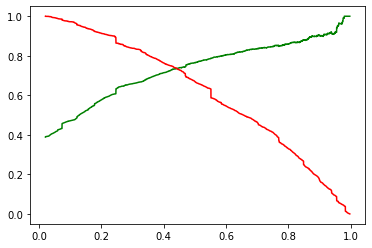

In [138]:
#plot
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [139]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.45 else 0)
y_train_pred_final.head()

,Converted,Conversion_Probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
0,0,0.589762,1,1,1,1,1,1,1,0,0,0,0,1,59
1,0,0.020272,0,1,0,0,0,0,0,0,0,0,0,0,2
2,0,0.242652,0,1,1,1,0,0,0,0,0,0,0,0,24
3,0,0.199965,0,1,1,0,0,0,0,0,0,0,0,0,20
4,1,0.762110,1,1,1,1,1,1,1,1,1,0,0,1,76


In [140]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7982083922677982

In [141]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3310,  625],
       [ 659, 1769]], dtype=int64)

In [142]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [143]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7389306599832915

In [144]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7285831960461285

With the current cut off as 0.45 we have Precision and Recall of around 73%.

## Prediction on Test set

In [145]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to dataframe
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Probability'})
y_pred_final.head()

,Converted,Conversion_Probability
0,1,0.904397
1,0,0.226872
2,0,0.123836
3,0,0.145303
4,1,0.637256


In [146]:
# Making prediction using cut off 0.45
y_pred_final['final_predicted'] = y_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.45 else 0)
y_pred_final

,Converted,Conversion_Probability,final_predicted
0,1,0.904397,1
1,0,0.226872,0
2,0,0.123836,0
3,0,0.145303,0
4,1,0.637256,1
...,...,...,...
2722,0,0.264724,0
2723,1,0.249273,0
2724,1,0.226940,0
2725,0,0.073478,0


In [147]:
# Now let us calculate the lead score

y_pred_final['lead_score'] = y_pred_final.Conversion_Probability.map(lambda x: round(x*100))
y_pred_final.head(10)

,Converted,Conversion_Probability,final_predicted,lead_score
0,1,0.904397,1,90
1,0,0.226872,0,23
2,0,0.123836,0,12
3,0,0.145303,0,15
4,1,0.637256,1,64
5,1,0.214707,0,21
6,0,0.099502,0,10
7,0,0.031040,0,3
8,0,0.122994,0,12
9,1,0.915983,1,92


### Check the overall accuracy

In [148]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7913458012467913

In [149]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1393,  267],
       [ 302,  765]], dtype=int64)

In [150]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [151]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7412790697674418

In [152]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7169634489222118

With the current cut off as 0.45 we have Precision around 74% , Recall around 72% and accuracy of around 79%.

# Conclusion

<br>**Most Impostant Points for buyers**<br>

What is your current occupation_Unemployed,
Last Activity_Email Opened,Last Activity_SMS Sent,
Total Time Spent on Website,
Last Notable Activity_Modified,
Lead Source_Olark Chat,
Last Notable Activity_Other notable activties,
Last Activity_Other activties,Do Not Email,
Lead Source_Reference,
Last Notable Activity_Olark Chat Conversation,
Lead Source_Other Social Sites.

<br>**Suggestions to CEO**<br>

A collection of "High priority" leads with a conversion rate of 75% or more can be created, and the sales staff can concentrate on this portion since it will convert quickly. With a conversion rate of 40% to74%, a group can be created as "Medium Priority," and the sales team can present them with offers since, with enough effort, these leads have a chance of being converted. With a conversion rate of less than 40%, the third group can be labelled as "Lowest priority," and the sales team should stay away from these leads because they have a lower likelihood of being converted.